In [4]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data
training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Step 1: Dataset Summary & Exploration¶

The pickled data is a dictionary with 4 key/value pairs:

> -    'features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
> -    'labels' is a 1D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id.
> -    'sizes' is a list containing tuples, (width, height) representing the original width and height the image.
> -    'coords' is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [7]:
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

#  Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training images =", n_train)
print("Number of validation images =", n_validation)
print("Number of testing images =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training images = 34799
Number of validation images = 4410
Number of testing images = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


###  Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

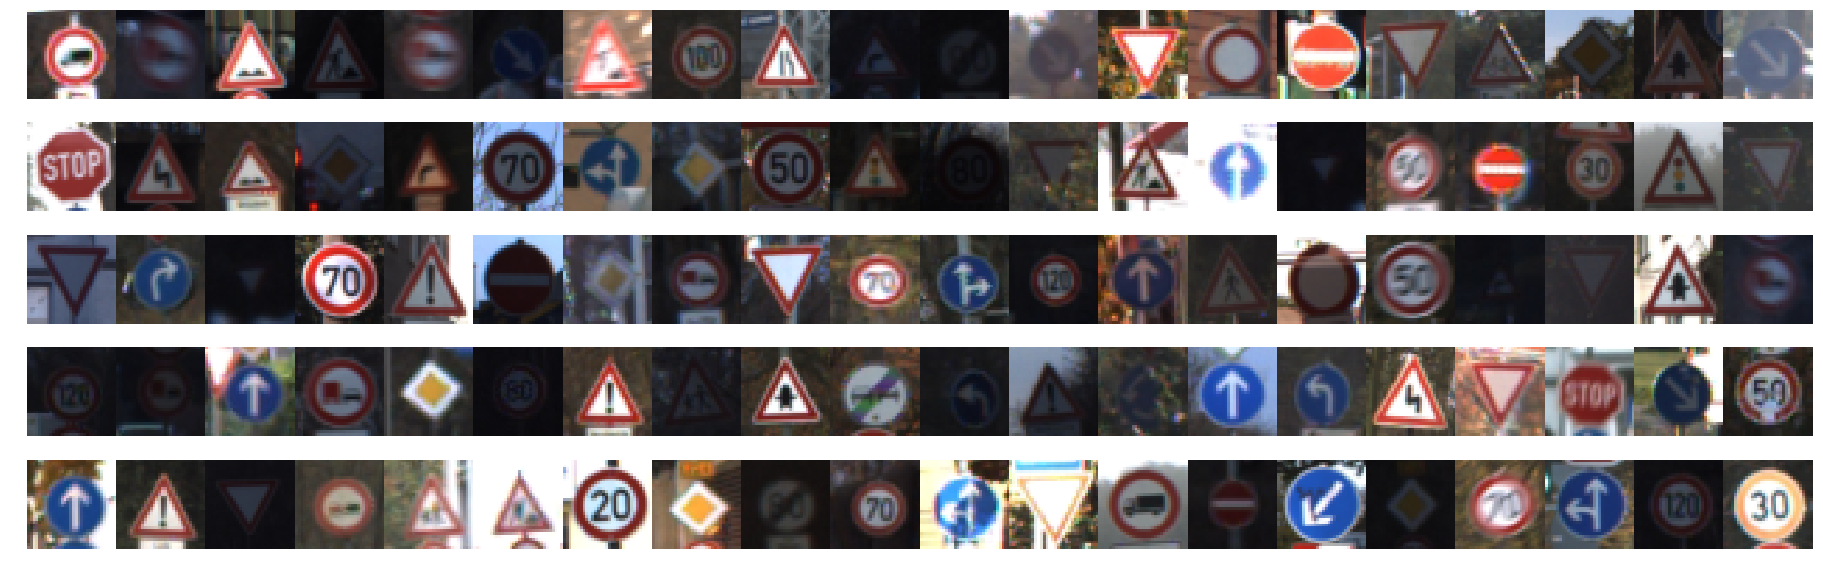

In [9]:
### Data exploration visualization code
import matplotlib.pyplot as plt
%matplotlib inline

def show_images(X, end, total, images_per_row = 30, images_per_col = 15,
                H = 20, W = 1, its_gray = False):    
    number_of_images = images_per_row * images_per_col
    figure, axis = plt.subplots(images_per_col, images_per_row, figsize=(H, W))
    figure.subplots_adjust(hspace = .2, wspace=.001)
    axis = axis.ravel()
    
    for i in range(number_of_images):
        index = np.random.randint(end - total, end - 1)
        image = X[index]
        axis[i].axis('off')
        if its_gray:
          axis[i].imshow(image.reshape(32, 32), cmap='gray')
        else:
          axis[i].imshow(image)

show_images(X_train, len(X_train), len(X_train), 
            images_per_row = 20, images_per_col = 5, 
            H = 32, W = 10)

### Data Set Summary


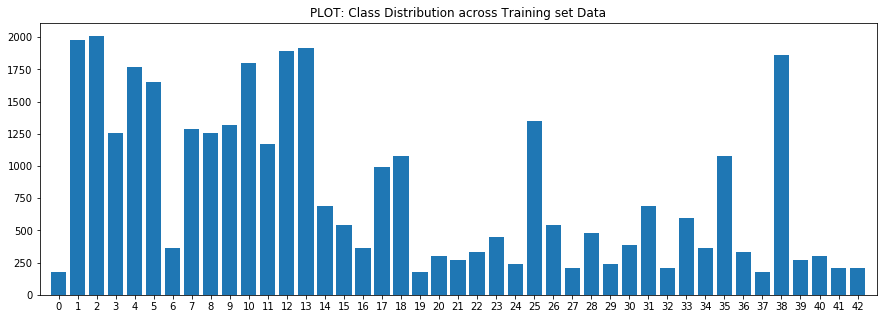

In [10]:
# Count frequency of each label
labels, counts = np.unique(y_train, return_counts=True)

# Plot the histogram
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(labels, counts, tick_label=labels, width=0.8, align='center')
plt.title('PLOT: Class Distribution across Training set Data')
plt.show()


### Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the classroom at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission.

There are various aspects to consider when thinking about this problem:

   * Neural network architecture (is the network over or underfitting?)
   * Play around preprocessing techniques (normalization, rgb to grayscale, etc)
   * Number of examples per label (some have more than others).
   * Generate fake data.




### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, (pixel - 128)/ 128 is a quick way to approximately normalize the data and can be used in this project.

Other pre-processing steps are optional. You can try different techniques to see if it improves performance.

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.



After plotting some images from the dataset it is observed that the certain amount of images are either too dark or too bright. Because of this an open cv based auto contrast correction technique is applied as preprocessing. As required by the network, all images are resized to 32x32 size. This step is also considered as part of preprocessing.

My preprocessing pipeline is as follows:

     1. Resize the image to 32x32
     2. Apply auto contrast adjustment



In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
#print("Using OpenCV version: %s" % (cv2.__version__))

#auto correction technique
def auto_contrast(img):
    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8, 8))

    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)  # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)  # split on 3 different channels

    l2 = clahe.apply(l)  # apply CLAHE to the L-channel

    lab = cv2.merge((l2, a, b))  # merge channels
    img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)  # convert from LAB to RGB
    return img2

def resize(image):
    return cv2.resize(image, (32, 32))

def image_preprocess(image):
    image = resize(image)
    image = auto_contrast(image)
    return image

In [ ]:
# Pre-processing on (training, test, validation sets)
X_train = np.array([image_preprocess(x) for x in X_train])
X_valid = np.array([image_preprocess(x) for x in X_valid])
X_test = np.array([image_preprocess(x) for x in X_test])

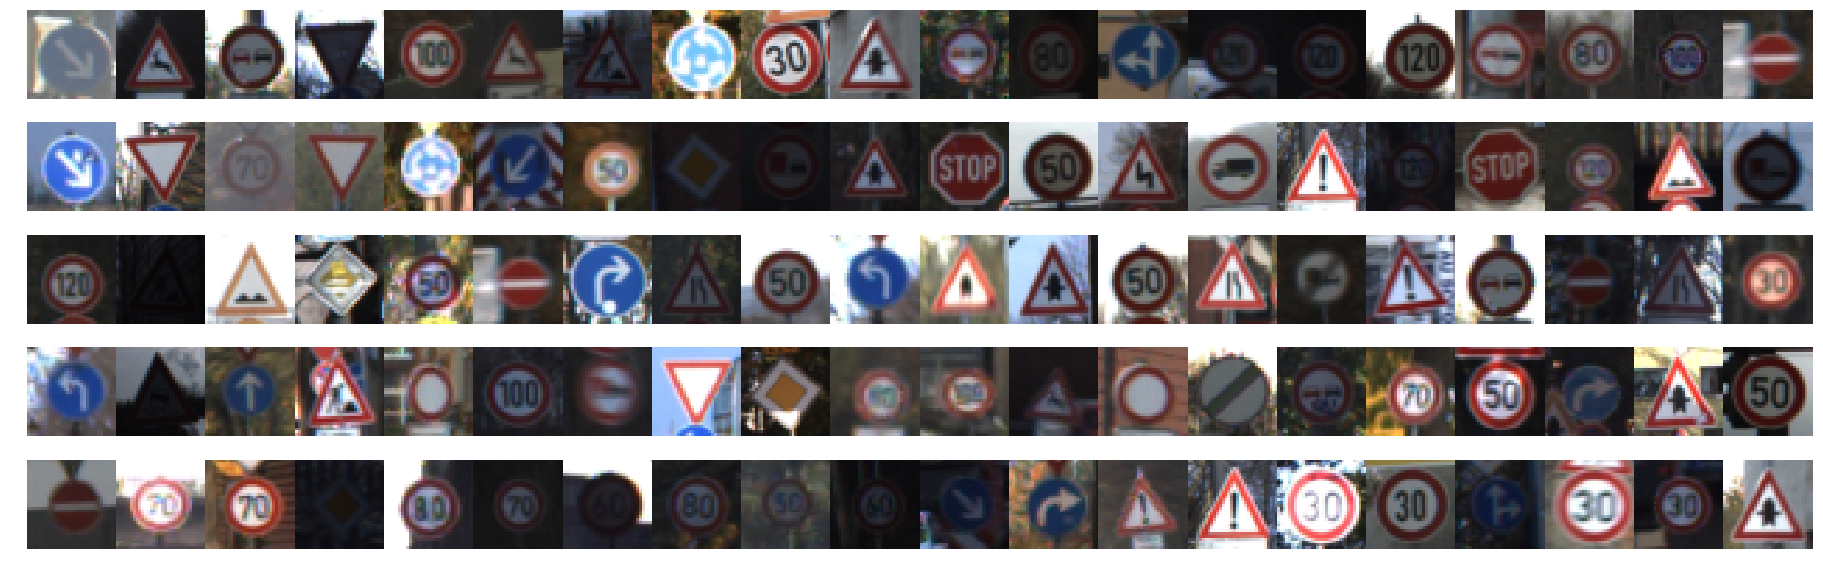

In [13]:
show_images(X_train, len(X_train), len(X_train), 
            images_per_row = 20, images_per_col = 5, 
            H = 32, W = 10, its_gray=False)

### Model Architecture


In [ ]:
def preprocess_op(x):
    p0 = tf.image.convert_image_dtype(x, tf.float32)
    p0 = tf.divide(tf.subtract(p0, 127.5), 127.5)
    return p0

### final model consist of the following layers:
     Layer 	       Input 	    Output
    Input 	       32x32x3 	
    Convolution    32x32x3 	    28x28x6
    Relu 		
    Dropout 		
    Max Pooling    28x28x6 	    14x14x6
    Convolution    14x14x6 	    10x10x16
    Relu 		
    Dropout 		
    Max Pooling 	10x10x16 	5x5x16
    Convolution 	5x5x16 	    120(flatten)
    Relu 		
    Dropout 		
    Fully Connected 	120 	  84
    Relu 		
    Dropout 		
    Fully Connected 	84 	      43

    


In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
#print("Using TensorFlow version: %s" % (tf.__version__))

def LeNet(x, keep_prob=1.0):
    mu = 0
    sigma = 0.1
    
    print("LeNet!")
    
    p0 = preprocess_op(x)
    
    # C1: Input 32x32x3, Output: 28x28x6
    weight1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma))
    bias1 = tf.Variable(tf.zeros(shape=(6)))
    conv1 = tf.nn.conv2d(p0, weight1, strides=(1, 1, 1, 1), padding='VALID')
    conv1 = tf.add(conv1, bias1)
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob=keep_prob)
    print("C1: Input %s Output %s" % (x.get_shape(), conv1.get_shape()))

    # P2 Input 28x28x6, Output: 14x14x6
    pool1 = tf.nn.max_pool(conv1, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='VALID')
    print("P2: Input %s Output %s" % (conv1.get_shape(), pool1.get_shape()))

    # C3 Input 14x14x6, Output: 10x10x16
    weight2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    bias2 = tf.Variable(tf.zeros(shape=(16)))
    conv2 = tf.nn.conv2d(pool1, weight2, strides=(1, 1, 1, 1), padding='VALID')
    conv2 = tf.add(conv2, bias2)
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob=keep_prob)
    print("C3: Input %s Output %s" % (pool1.get_shape(), conv2.get_shape()))

    # P4 Input 10x10x16, Output 5x5x16
    pool2 = tf.nn.max_pool(conv2, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='VALID')
    print("P4: Input %s Output %s" % (conv2.get_shape(), pool2.get_shape()))
    
    # C5: Input 5x5x16, Output 1x120
    fc1 = tf.contrib.layers.flatten(pool2)
    weight3 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    bias3 = tf.Variable(tf.zeros(shape=(120)))
    fc1 = tf.matmul(fc1, weight3)
    fc1 = tf.add(fc1, bias3)
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)
    print("C5: Input %s Output %s" % (pool2.get_shape(), fc1.get_shape()))

    # F6 Input 1x120, Output 1x84
    weights4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    bias4 = tf.Variable(tf.zeros(shape=(84)))
    fc2 = tf.matmul(fc1, weights4)
    fc2 = tf.add(fc2, bias4)
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)
    print("F6: Input %s Output %s" % (fc1.get_shape(), fc2.get_shape()))

    # F7 Input 1x84, Output 1x10
    weight5 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    bias5 = tf.Variable(tf.zeros(shape=(43)))
    logits = tf.matmul(fc2, weight5)
    logits = tf.add(logits, bias5)
    print("F7: Input %s Output %s" % (fc2.get_shape(), logits.get_shape()))

    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.


In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
height, width, channels = X_train[0].shape
x = tf.placeholder(tf.float32, shape=(None, height, width, channels))
y = tf.placeholder(tf.int32, shape=(None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)


In [ ]:
rate = 0.001

logits = LeNet(x, keep_prob) 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=one_hot_y)
loss_operations = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operations)

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operations], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

Following are the parameters are used to train my model:

   1. Learning Rate = 0.001
   2. Number of Epochs = 30
   3. Batch Size = 128
   4. Optimizer = Adam Optimizer


In [ ]:
### Calculate and report the accuracy on the training and validation set.
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        training_accuracy, training_loss = evaluate(X_train, y_train)
        validation_accuracy, validation_loss = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f} Loss = {:.3f}".format(training_accuracy, training_loss))
        print("Validation Accuracy = {:.3f} Loss = {:.3f}".format(validation_accuracy, validation_loss))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training ...

EPOCH 1 ...
Training Accuracy = 0.557 Loss = 2.024
Validation Accuracy = 0.514 Loss = 2.086

EPOCH 2 ...
Training Accuracy = 0.738 Loss = 1.407
Validation Accuracy = 0.707 Loss = 1.474

EPOCH 3 ...
Training Accuracy = 0.816 Loss = 1.072
Validation Accuracy = 0.796 Loss = 1.140

EPOCH 4 ...
Training Accuracy = 0.869 Loss = 0.866
Validation Accuracy = 0.829 Loss = 0.943

EPOCH 5 ...
Training Accuracy = 0.905 Loss = 0.711
Validation Accuracy = 0.864 Loss = 0.806

EPOCH 6 ...
Training Accuracy = 0.921 Loss = 0.612
Validation Accuracy = 0.893 Loss = 0.698

EPOCH 7 ...
Training Accuracy = 0.925 Loss = 0.531
Validation Accuracy = 0.904 Loss = 0.608

EPOCH 8 ...
Training Accuracy = 0.937 Loss = 0.476
Validation Accuracy = 0.917 Loss = 0.552

EPOCH 9 ...
Training Accuracy = 0.943 Loss = 0.437
Validation Accuracy = 0.910 Loss = 0.530

EPOCH 10 ...
Training Accuracy = 0.947 Loss = 0.407
Validation Accuracy = 0.919 Loss = 0.498

EPOCH 11 ...
Training Accuracy = 0.951 Loss = 0.378
Validation Accuracy = 0.919 Loss = 0.475

EPOCH 12 ...
Training Accuracy = 0.958 Loss = 0.341
Validation Accuracy = 0.915 Loss = 0.457

EPOCH 13 ...
Training Accuracy = 0.963 Loss = 0.311
Validation Accuracy = 0.925 Loss = 0.411

EPOCH 14 ...
Training Accuracy = 0.966 Loss = 0.312
Validation Accuracy = 0.925 Loss = 0.411

EPOCH 15 ...
Training Accuracy = 0.968 Loss = 0.294
Validation Accuracy = 0.922 Loss = 0.408

EPOCH 16 ...
Training Accuracy = 0.967 Loss = 0.259
Validation Accuracy = 0.934 Loss = 0.355

EPOCH 17 ...
Training Accuracy = 0.968 Loss = 0.257
Validation Accuracy = 0.927 Loss = 0.374

EPOCH 18 ...
Training Accuracy = 0.968 Loss = 0.235
Validation Accuracy = 0.927 Loss = 0.339

EPOCH 19 ...
Training Accuracy = 0.972 Loss = 0.237
Validation Accuracy = 0.935 Loss = 0.343

EPOCH 20 ...
Training Accuracy = 0.976 Loss = 0.212
Validation Accuracy = 0.936 Loss = 0.329

EPOCH 21 ...
Training Accuracy = 0.977 Loss = 0.206
Validation Accuracy = 0.939 Loss = 0.311

EPOCH 22 ...
Training Accuracy = 0.977 Loss = 0.207
Validation Accuracy = 0.936 Loss = 0.323

EPOCH 23 ...
Training Accuracy = 0.979 Loss = 0.185
Validation Accuracy = 0.941 Loss = 0.287

EPOCH 24 ...
Training Accuracy = 0.979 Loss = 0.192
Validation Accuracy = 0.937 Loss = 0.311

EPOCH 25 ...
Training Accuracy = 0.978 Loss = 0.171
Validation Accuracy = 0.941 Loss = 0.277

EPOCH 26 ...
Training Accuracy = 0.980 Loss = 0.179
Validation Accuracy = 0.946 Loss = 0.288

EPOCH 27 ...
Training Accuracy = 0.980 Loss = 0.161
Validation Accuracy = 0.946 Loss = 0.274

EPOCH 28 ...
Training Accuracy = 0.981 Loss = 0.159
Validation Accuracy = 0.945 Loss = 0.262

EPOCH 29 ...
Training Accuracy = 0.983 Loss = 0.155
Validation Accuracy = 0.948 Loss = 0.271

EPOCH 30 ...
Training Accuracy = 0.984 Loss = 0.151
Validation Accuracy = 0.944 Loss = 0.265

Model saved

In [ ]:
### the accuracy on the test set should be calculated and reported as well.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, _ = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.93

In [ ]:
print("Training set accuracy = {:.3f}".format(training_accuracy))
print("Validation set accuracy = {:.3f}".format(validation_accuracy))
print("Test set accuracy = {:.3f}".format(test_accuracy))

Training set accuracy = 0.984
Validation set accuracy = 0.944
Test set accuracy = 0.938


### Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find signnames.csv useful as it contains mappings from the class id (integer) to the actual sign name.
###  Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import os

filelist = glob.glob("*.jpg")

test_images = []
test_labels = []
for filename in filelist:
    print(filename)
    image = cv2.imread(filename)
    if image is None:
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    test_images.append(image)
    sign_name = os.path.splitext(filename)[0]
    test_labels.append(int(sign_name))
print("Number of test images =", len(test_images))
#show_images(test_images, len(test_images), len(test_images), 
#            images_per_row = len(filelist), images_per_col = 1, 
#            H = 10, W = 10, its_gray=False)
print("Test Labels: ", test_labels)
#test_images[0].shape


4.jpg
17.jpg
14.jpg
12.jpg
2.jpg
1.jpg
Number of test images = 6
Test Labels:  [4, 17, 14, 12, 2, 1]

I have selected 6 random German Traffic signs. They are of classes - 

1. speed limit 30, 
2. speed limit 50, 
4. speed limit 70, 
17. No Entry
14. Stop  
12. Priority. 


Out of this 6 signs, 5 got classified correctly. Misclassified sign is speed limit 30

### Predict the Sign Type for Each Image


In [ ]:
test_images_pre = [image_preprocess(i) for i in test_images]

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import csv

signs_class=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_class.append((row['SignName']))

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    pred = sess.run(logits, feed_dict={x: test_images_pre, keep_prob: 1.0})
    output = np.argmax(pred, axis=1)
    print("Predicted   :", output)
    print("Ground Truth:", np.array(test_labels))

INFO:tensorflow:Restoring parameters from ./lenet
Predicted   : [ 4 17 14 12  2  2]
Ground Truth: [ 4 17 14 12  2  1]

###  Analyze Performance


In [ ]:

### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, _ = evaluate(test_images_pre, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))



INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.833


### Output Top 5 Softmax Probabilities For Each Image Found on the Web



For each of the new images, print out the model's softmax probabilities to show the certainty of the model's predictions (limit the output to the top 5 probabilities for each image). tf.nn.top_k could prove helpful here.

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

tf.nn.top_k will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. tf.nn.top_k is used to choose the three classes with the highest probability:

 (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])

Running it through sess.run(tf.nn.top_k(tf.constant(a), k=3)) produces:

TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))

Looking just at the first row we get [ 0.34763842,  0.24879643,  0.12789202], you can confirm these are the 3 largest probabilities in a. You'll also notice [3, 0, 5] are the corresponding indices.


In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    signs_top_5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = 5), feed_dict={x: test_images_pre, keep_prob: 1.0})
    print("Predicted   :", signs_top_5)

INFO:tensorflow:Restoring parameters from ./lenet


Predicted   : TopKV2(values=array([[9.11246359e-01, 7.43291378e-02, 9.22355428e-03, 1.22498453e-03,
        1.21638970e-03],
       [9.99999166e-01, 8.85979489e-07, 8.92348140e-10, 3.81197712e-10,
        3.67172237e-10],
       [9.67177510e-01, 1.20190699e-02, 6.96608843e-03, 2.49543856e-03,
        1.96893746e-03],
       [1.00000000e+00, 2.24168470e-12, 2.62942093e-13, 7.94377110e-14,
        2.43091561e-14],
       [9.10831332e-01, 4.48558368e-02, 2.58830953e-02, 1.74687281e-02,
        4.76850866e-04],
       [2.02121958e-01, 1.20504126e-01, 8.39806125e-02, 8.37136507e-02,
        4.91460077e-02]], dtype=float32), indices=array([[ 4,  1,  0,  5,  2],
       [17, 14, 12,  1, 29],
       [14, 15,  2,  1, 13],
       [12, 13, 26, 17, 42],
       [ 2,  3,  5,  1,  7],
       [ 2,  1,  3,  5, 15]], dtype=int32))

### Step 4 (Optional): Visualize the Neural Network's State with Test Images 

This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the LeNet lab's feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper End-to-End Deep Learning for Self-Driving Cars in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")